**Objective -** This notebook aims to predict the car sales price using artificial neural network.

In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


**Drop Irrelevant Columns**

In [6]:
df.drop(['customer name', 'customer e-mail', 'country','gender'], axis = 1, inplace = True)

**Define X and y**

In [7]:
X = df.drop('car purchase amount', axis = 1)
y = df['car purchase amount']

**Data Scaling**

In [8]:
mm = MinMaxScaler()
X = mm.fit_transform(X)
y = mm.fit_transform(y.values.reshape(-1,1))

**Data Splitting**

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400, 1)
(100, 1)


**Model Structure**

In [10]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = [4]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [11]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
10/10 [==============================] - 1s 32ms/step - loss: 0.3081 - mean_absolute_error: 0.5340 - val_loss: 0.2761 - val_mean_absolute_error: 0.4997
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2165 - mean_absolute_error: 0.4421 - val_loss: 0.2004 - val_mean_absolute_error: 0.4194
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1534 - mean_absolute_error: 0.3666 - val_loss: 0.1414 - val_mean_absolute_error: 0.3449
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.2986 - val_loss: 0.0997 - val_mean_absolute_error: 0.2804
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.2484 - val_loss: 0.0735 - val_mean_absolute_error: 0.2332
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.2073 - val_loss: 0.0550 - val_mean_absolute_error: 0.1957
Epoch 7/50
10/10 [=========

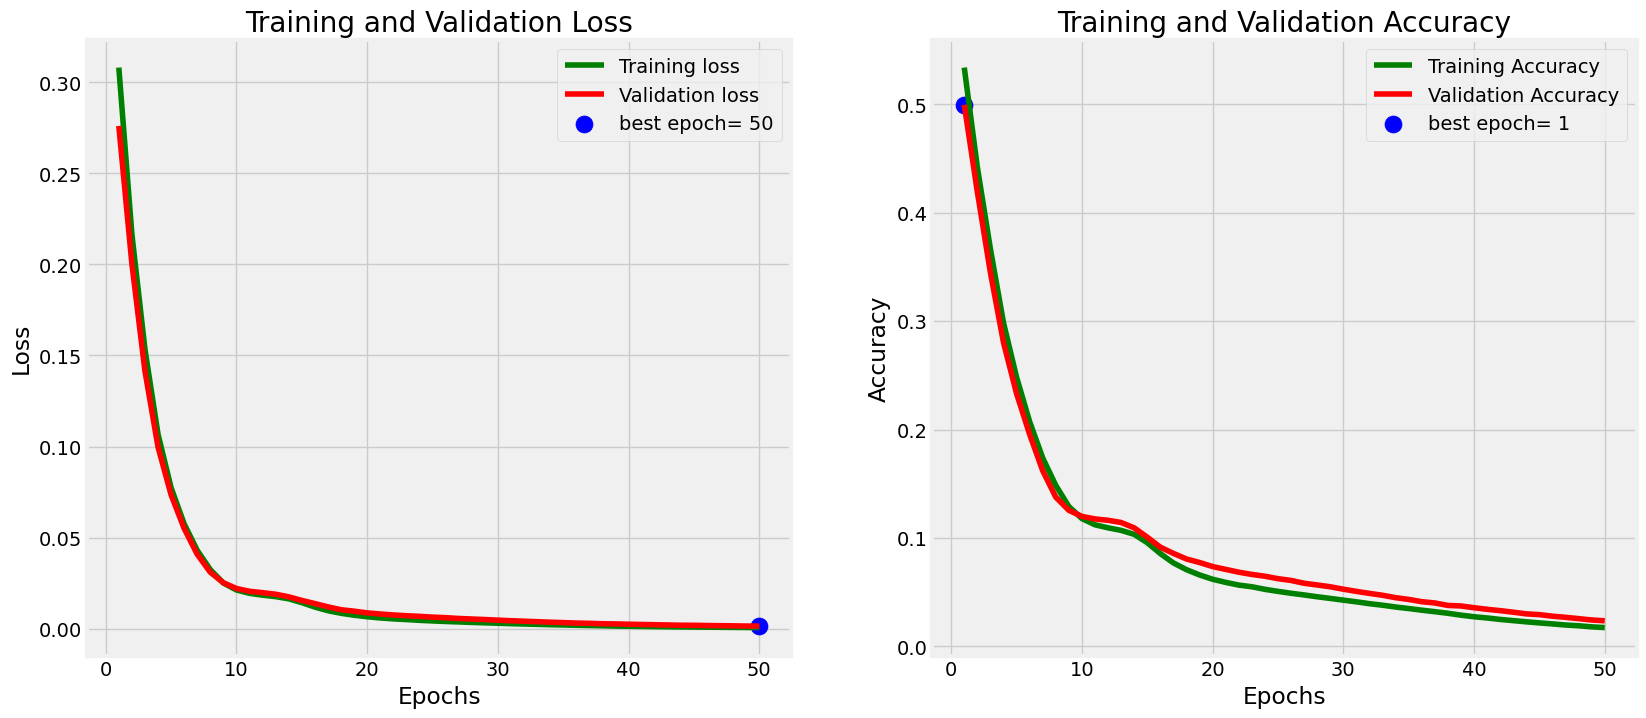

In [13]:
#Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

epoch = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss +1)}'
acc_label = f'best epoch= {str(index_acc +1)}'

#Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epoch, tr_loss, 'g', label = 'Training loss')
plt.plot(epoch, val_loss, 'r', label = 'Validation loss')

plt.scatter(index_loss + 1, val_lowest, s= 150, c = 'blue', label = loss_label)
plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, tr_acc,'g',label = 'Training Accuracy')
plt.plot(epoch, val_acc, 'r', label = 'Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s = 150, c= 'blue', label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

**Prediction**

In [14]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [15]:
from sklearn.metrics import r2_score

print('R2 Score = ',r2_score(y_test, y_pred) )

R2 Score =  0.9740030723435846
